Streaming output truncated to the last 5000 lines.
Iteration 0: Training Loss = 300.09967041015625 Training Accuracy = 0.0
Iteration 1: Training Loss = 300.00433349609375 Training Accuracy = 0.0
Iteration 2: Training Loss = 299.8702392578125 Training Accuracy = 0.0
Iteration 3: Training Loss = 299.6755676269531 Training Accuracy = 0.0
Iteration 4: Training Loss = 299.3922119140625 Training Accuracy = 0.0
Iteration 5: Training Loss = 298.9767150878906 Training Accuracy = 2.1258502513887834e-08
Iteration 6: Training Loss = 298.3673400878906 Training Accuracy = 2.1258502513887834e-08
Iteration 7: Training Loss = 297.47369384765625 Training Accuracy = 2.1258502513887834e-08
Iteration 8: Training Loss = 296.1731262207031 Training Accuracy = 2.1258502513887834e-08
Iteration 9: Training Loss = 294.3092041015625 Training Accuracy = 2.1258502513887834e-08
Iteration 10: Training Loss = 291.6784973144531 Training Accuracy = 0.0
Iteration 11: Training Loss = 288.00982666015625 Training Accuracy = 

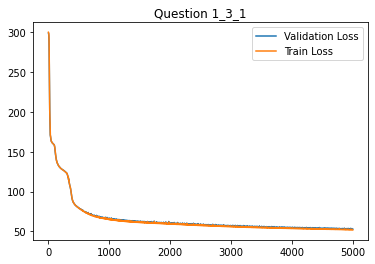

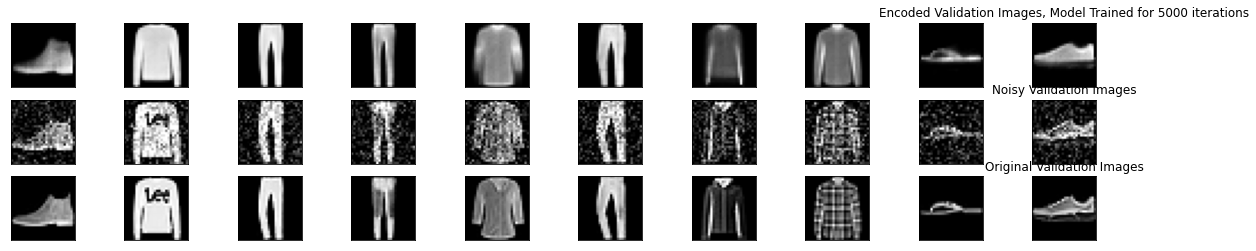

Execution Time:  294.21341311599997


In [1]:
# -*- coding: utf-8 -*-
"""
Name: Shane Quinn
Student Number: R00144107
Email: shane.quinn1@mycit.ie
Course: MSc Artificial Intelligence
Module: Deep Learning
Date: 03/04/2021
"""

import tensorflow as tf
from keras.utils import np_utils
from tensorflow.python.client import device_lib
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import functools
import time
import numpy as np


def forward_pass(X, w1, w2, w3, w4, w5, w6, b1, b2, b3, b4, b5, b6):
    """
    Push feature data through neural network. Final sigmoid activation layer returns flattened encoded pixel values
    between 0 and 1 (black and white). 

    Parameters
    ----------
    X : tf.Variable
        Pre-processed input data.
    w1 : tf.Variable
        Layer 1 learnable weights.
    w2 : tf.Variable
        Layer 2 learnable weights.
    w3 : tf.Variable
        Layer 3 learnable weights.
    w4 : tf.Variable
        Layer 4 learnable weights.
    w5 : tf.Variable
        Layer 5 learnable weights.
    w6 : tf.Variable
        Layer 6 learnable weights.
    b1 : tf.Variable
        Layer 1 bias.
    b2 : tf.Variable
        Layer 2 bias.
    b3 : tf.Variable
        Layer 3 bias.
    b4 : tf.Variable
        Layer 4 bias.
    b5 : tf.Variable
        Layer 5 bias.
    b6 : tf.Variable
        Layer 6 bias.

    Returns
    -------
    H : td.Variable
        Flattened autoencoded pixel values between 0 and 1.

    """    

    #Layer 1: 128 Relu Neruons
    A = tf.matmul(w1, tf.transpose(X)) + b1                    #A1 = w1.X + b1
    H = tf.keras.activations.relu(A)                          #H1 = act(A1)
    #Layer 2: 64 Relu Neruons
    A = tf.matmul(w2, H) + b2                                 #A2 = w2.H1 + b2
    H = tf.keras.activations.relu(A)                          #H2 = act(A2)     
    #Layer 3: 32 Relu Neurons
    A = tf.matmul(w3, H) + b3                                 #A3 = w3.H2 + b3
    H = tf.keras.activations.relu(A)                          #H3 = act(A3)
    #Layer 4: 64 Relu Neurons
    A = tf.matmul(w4, H) + b4                                 #A4 = w2.H1 + b4
    H = tf.keras.activations.relu(A)                          #H4 = act(A4)
    #Layer 5: 128 Relu Neurons
    A = tf.matmul(w5, H) + b5                                 #A5 = w5.H1 + b5
    H = tf.keras.activations.relu(A)                          #H5 = act(A5) 
    #Layer 6: 784 Sigmoid Neurons 
    A = tf.matmul(w6, H) + b6                                   #A6 = w6.H5 + b6
    H = tf.sigmoid(A)                                           #H6 = sigmoid(A6)

    H = tf.transpose(H)
    
    return H
    





def mean_absolute_error(X_encoded, X_true):
    """
    Returns mean absolute error given encoded image and true image data

    Parameters
    ----------
    X_encoded : tf.Variable
        DESCRIPTION.
    X_true : tf.Variable
        DESCRIPTION.

    Returns
    -------
    mae : float
        Mean absolute error.
    """
    
    mae = tf.math.divide(tf.reduce_sum(abs(tf.math.subtract(X_true, X_encoded))), X_encoded.shape[0])

    return mae



def calculate_accuracy(X_encoded, X):
    """
    Calculate the model accuracy given encoded and original images

    Parameters
    ----------
    X_encoded : tf.Variable
        Encoded image (output of forward pass).
    X : tf.Variable
        Original Images.

    Returns
    -------
    accuracy : float32
        Model Accuracy.
    """

    # Boolean True (1) if prediction is correct
    predictions = tf.cast(tf.equal(X_encoded, X), tf.float32)
    #Mean value of correct predictions
    accuracy = tf.reduce_mean(predictions)
    
    return accuracy


def exec_time(func):
    """
    Generic Execution time recorder, pass in function. Records execution time using decorators

    Parameters
    ----------
    func : FUNCTION
        Function .


    """
    
    @functools.wraps(func)
    def record_exec_time(*args, **kwargs):
        start_time = time.perf_counter()
        mn = func(*args, **kwargs)
        execution_time = time.perf_counter() - start_time
        print("Execution Time: ", execution_time)
        return mn

    return record_exec_time

@exec_time 
def main():
      
    X, nX, X_val, nX_val = pre_process() 

    #Initialise Learning rate and iterations.
    learning_rate = 0.05
    iterations = 5000
    datatype = tf.float32

    
    #Initialise lists for saving accuracies/loss
    te_acc = []
    tr_acc = []
    te_loss = []
    tr_loss = []
    
    # Create tf variables from data
    X = tf.cast(X, datatype)
    nX = tf.cast(nX, datatype)
    X_val = tf.cast(X_val, datatype)
    nX_val = tf.cast(nX_val, datatype)
    
    #Initialise Adam Optimizer
    adam = tf.keras.optimizers.Adam()
    
    #Initialise weights and bias
    zeros = tf.zeros_initializer()
    layer1_weights = tf.Variable(tf.random.normal([128,784], stddev=0.05, dtype=datatype))
    layer2_weights = tf.Variable(tf.random.normal([64, 128], stddev=0.05, dtype=datatype))
    layer3_weights = tf.Variable(tf.random.normal([32, 64], stddev=0.05, dtype=datatype))
    layer4_weights = tf.Variable(tf.random.normal([64,32], stddev=0.05, dtype=datatype))
    layer5_weights = tf.Variable(tf.random.normal([128, 64], stddev=0.05, dtype=datatype))
    layer6_weights = tf.Variable(tf.random.normal([784, 128], stddev=0.05, dtype=datatype))
    layer1_bias = tf.Variable(0, dtype=datatype)
    layer2_bias = tf.Variable(0, dtype=datatype)
    layer3_bias = tf.Variable(0, dtype=datatype)
    layer4_bias = tf.Variable(0, dtype=datatype)
    layer5_bias = tf.Variable(0, dtype=datatype)
    layer6_bias = tf.Variable(0, dtype=datatype)
    

    for i in range(iterations):
        
        with tf.GradientTape() as tape:
            #Create instance of gradient tape to record forward pass and calculate gradients for learnable weights and biases
            encoded_X = forward_pass(nX, layer1_weights, layer2_weights, layer3_weights,
                                  layer4_weights, layer5_weights, layer6_weights,
                                  layer1_bias, layer2_bias, layer3_bias, 
                                  layer4_bias, layer5_bias, layer6_bias)
            loss = mean_absolute_error(encoded_X, X)
            
        tr_loss.append(loss)
        #Calculate Gradients using gradient tape
        gradients = tape.gradient(loss, [layer1_weights, layer2_weights, layer3_weights,
                                          layer4_weights, layer5_weights, layer6_weights,
                                          layer1_bias, layer2_bias, layer3_bias, 
                                          layer4_bias, layer5_bias, layer6_bias])
        accuracy = calculate_accuracy(encoded_X, X)
        tr_acc.append(accuracy)
        print("Iteration {}: Training Loss = {} Training Accuracy = {}".format(i, loss.numpy(), accuracy.numpy()))
        
        #Apply gradients using adaptive movement estimation, see accompanied report for more details
        adam.apply_gradients(zip(gradients, [layer1_weights, layer2_weights, layer3_weights,
                                              layer4_weights, layer5_weights, layer6_weights,
                                              layer1_bias, layer2_bias, layer3_bias, 
                                              layer4_bias, layer5_bias, layer6_bias, ]))
        
        #Test model on validation data
        test_encoded_X = forward_pass(nX_val, layer1_weights, layer2_weights, layer3_weights,
                                  layer4_weights, layer5_weights, layer6_weights,
                                  layer1_bias, layer2_bias, layer3_bias, 
                                  layer4_bias, layer5_bias, layer6_bias)
        test_loss = mean_absolute_error(test_encoded_X, X_val)
        te_loss.append(test_loss)
        te_acc.append(calculate_accuracy(test_encoded_X, X_val))
        
        
    

    plt.title("Question 1_3_1")
    plt.plot(te_loss, label="Validation Loss")
    plt.plot(tr_loss, label="Train Loss")
    plt.legend()
    plt.show()    

    n=10
    plt.figure(figsize=(20, 4))
    
    for i in range(n):
        # Display 10 original validation images
        ax1 = plt.subplot(3, n, i + 1)
        plt.imshow(test_encoded_X[i].numpy().reshape(28, 28))
        plt.gray()
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        
        
        # Display above images after noise added
        ax2 = plt.subplot(3, n, i + 1 + n)
        plt.imshow(nX_val[i].numpy().reshape(28, 28))
        plt.gray()
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        
        
        # Display above images after processed through autoencoder
        ax3 = plt.subplot(3, n, i + 1 + n*2)
        plt.imshow(X_val[i].numpy().reshape(28, 28))
        plt.gray()
        ax3.get_xaxis().set_visible(False)
        ax3.get_yaxis().set_visible(False)
        
    ax1.title.set_text('Encoded Validation Images, Model Trained for {} iterations'.format(iterations)) 
    ax2.title.set_text('Noisy Validation Images')
    ax3.title.set_text('Original Validation Images')
            
    plt.show()

 
  

def pre_process():
    """
    Supplied code, from fashion MNIST dataset creates noisy images, returns noisy and original train and test data

    Returns
    -------
    x_train : tf.Variable
        Original training images.
    x_train_noisy : tf.Variable
        Noisy training images.
    x_test : tf.Variable
        Original test images.
    x_test_noisy : tf.Variable
        Noisy test images.
    """

    (x_train, _), (x_test, _) = fashion_mnist.load_data()
    # Normalize train and test data
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    
    # Reshape so that each instance is a linear array of 784 normalized pixel values
    x_train = x_train.reshape((len(x_train), 784))
    x_test = x_test.reshape((len(x_test), 784))

    # Add random noise to the image
    noise_factor = 0.2
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
    x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 
    
    # Clip the resulting values so that they don't fall outside the upper and lower normalized value of 0 and 1
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
       
    return x_train, x_train_noisy, x_test, x_test_noisy
    

if __name__ == '__main__':
    print("Local Devices: \n", device_lib.list_local_devices())
    main()